<a href="https://colab.research.google.com/github/kakkiichan/Machine-Learning/blob/master/Regression/Iris_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()


X = iris.data[:, [2,3]]
y = iris.target

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# トレーニングデータとテストデータに分割。
# 今回は訓練データを70%、テストデータは30%としている。
# 乱数を制御するパラメータ random_state は None にすると毎回異なるデータを生成する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
model = SVC(kernel='linear', random_state=None)

# モデルの学習。fit関数で行う。
model.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.95


In [10]:
# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

テストデータに対する正解率： 0.96


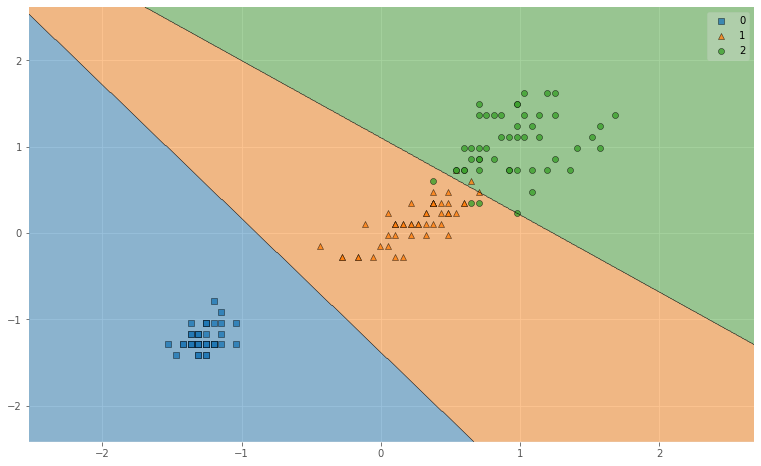

In [11]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()